## 4.1.1 - Running regressions for all products in one model

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
from statistics import mean 

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


import matplotlib.pyplot       as plt
import seaborn                 as sns

### Loading the cleaned dataset

In [2]:
df = pd.read_csv('../data/celular_over50.csv', dtype={'gtin':'str'})
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,competition_price,gtin,item_name,orders,olist_price,freight_value,price_ratio,freight_ratio,weekday_1,...,monthday_22,monthday_23,monthday_24,monthday_25,monthday_26,monthday_27,monthday_28,monthday_29,monthday_30,monthday_31
0,2019-07-14,419.90,6438409014344,Nokia 8110 4g dual chip amarelo .,1.0,419.9,24.23,1.000000,0.057704,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-07-15,419.90,6438409014344,Nokia 8110 4g Dual Chip Amarelo,1.0,419.9,24.23,1.000000,0.057704,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-07-21,377.91,6438409014344,Nokia 8110 4g Dual Chip Amarelo,1.0,419.9,24.23,1.111111,0.057704,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-07-27,377.91,6438409014344,Nokia 8110 4g dual chip amarelo .,1.0,419.9,42.58,1.111111,0.101405,0,...,0,0,0,0,0,1,0,0,0,0
4,2019-08-05,379.90,6438409014344,Nokia 8110 4g Dual Chip Amarelo,1.0,419.9,20.19,1.105291,0.048083,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,competition_price,orders,olist_price,freight_value,price_ratio,freight_ratio,weekday_1,weekday_2,weekday_3,weekday_4,...,monthday_22,monthday_23,monthday_24,monthday_25,monthday_26,monthday_27,monthday_28,monthday_29,monthday_30,monthday_31
count,22908.000000,22908.000000,22908.000000,22908.000000,22908.000000,22908.000000,22908.000000,22908.000000,22908.000000,22908.000000,...,22908.000000,22908.000000,22908.000000,22908.000000,22908.000000,22908.000000,22908.000000,22908.000000,22908.000000,22908.000000
mean,383.803589,0.949450,381.690125,13.306168,1.002510,0.067974,0.145320,0.144666,0.144840,0.143007,...,0.033263,0.032740,0.032958,0.032390,0.032783,0.033307,0.032478,0.031386,0.031430,0.019731
std,343.014487,9.267128,335.194410,10.923233,0.135873,0.074435,0.352431,0.351771,0.351947,0.350087,...,0.179328,0.177958,0.178530,0.177039,0.178073,0.179441,0.177269,0.174364,0.174481,0.139078
min,44.995000,0.000000,5.562500,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,134.100000,0.000000,129.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,279.900000,0.000000,279.900000,17.096000,1.000000,0.058641,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,526.910000,0.000000,535.310000,19.990000,1.000000,0.102946,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2743.900000,842.000000,2057.333333,113.700000,2.327112,1.506638,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Basic EDA

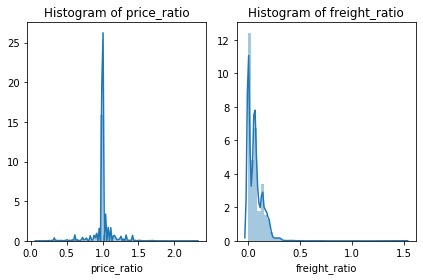

In [4]:
plt.subplot(1, 2, 1)
sns.distplot(df['price_ratio'])
plt.title('Histogram of price_ratio')

plt.subplot(1, 2, 2)
sns.distplot(df['freight_ratio'])
plt.title('Histogram of freight_ratio')

plt.tight_layout()          
plt.show()


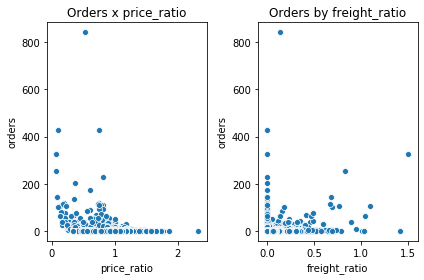

In [5]:
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'price_ratio', y = 'orders', data = df)
plt.title('Orders x price_ratio')

plt.subplot(1, 2, 2)
sns.scatterplot(x = 'freight_ratio', y = 'orders', data = df)
plt.title('Orders by freight_ratio')

plt.tight_layout()          
plt.show()


### Normalizing the prices and freights

In [6]:
df['competition_price_sc'] = df.groupby('gtin').competition_price.transform(lambda x: minmax_scale(x.astype(float)))
df['price_sc'] = df.groupby('gtin').olist_price.transform(lambda x: minmax_scale(x.astype(float)))
df['freight_sc'] = df.groupby('gtin').freight_value.transform(lambda x: minmax_scale(x.astype(float)))

### Trying some regressions

In [7]:
mae = []
for i in range(0,100):
    train, test = train_test_split(df, test_size=0.8)
    formula = 'orders ~ price_sc + competition_price_sc + freight_ratio'
    model = smf.ols(formula = formula, data = train).fit()
    mae.append(metrics.median_absolute_error(test['orders'], model.predict(test)))

mean(mae)    
#print(model.summary())
    

1.0186109034186788

In [8]:
mae = []
for i in range(0,100):
    train, test = train_test_split(df, test_size=0.8)
    formula = 'orders ~ price_ratio + freight_ratio'
    model = smf.ols(formula = formula, data = train).fit()
    mae.append(metrics.median_absolute_error(test['orders'], model.predict(test)))

mean(mae)
#print(model.summary())
    

1.023008381338282

In [9]:
mae = []
for i in range(0,100):
    train, test = train_test_split(df, test_size=0.8)
    formula = 'orders ~ price_ratio + freight_value'
    model = smf.ols(formula = formula, data = train).fit()
    mae.append(metrics.median_absolute_error(test['orders'], model.predict(test)))

mean(mae)    
#print(model.summary())
    

1.00013081845005

In [10]:
mae = []
for i in range(0,100):
    train, test = train_test_split(df, test_size=0.8)
    formula = 'orders ~ price_ratio + freight_ratio + competition_price_sc + price_sc + freight_sc + weekday_1 + weekday_2 + weekday_3 +\
        weekday_4 + weekday_5 + weekday_6 + week_2 + week_3 + week_4 + week_5 + week_6 + week_7 + \
        week_8 + week_9 + week_10 + week_11 + week_12 + week_13 + week_14 + week_15 + week_16 + week_17 +\
        week_18 + week_19 + week_20 + week_21 + week_22 + week_23 + week_24 + week_25 + week_26 + week_27 +\
        week_28 + week_29 + week_30 + week_31 + week_32 + week_33 + week_34 + week_35 + week_36 + week_37 +\
        week_38 + week_39 + week_40 + week_41 + week_42 + week_43 + week_44 + week_45 + week_46 + week_47 +\
        week_48 + week_49 + week_50 + week_51 + week_52 + month_2 + month_3 + month_4 + month_5 + month_6 +\
        month_7 + month_8 + month_9 + month_10 + month_11 + month_12 + monthday_2 + monthday_3 + monthday_4 +\
        monthday_5 + monthday_6 + monthday_7 + monthday_8 + monthday_9 + monthday_10 + monthday_11 + monthday_12 +\
        monthday_13 + monthday_14 + monthday_15 + monthday_16 + monthday_17 + monthday_18 + monthday_19 +\
        monthday_20 + monthday_21 + monthday_22 + monthday_23 + monthday_24 + monthday_25 + monthday_26 +\
        monthday_27 + monthday_28 + monthday_29 + monthday_30 + monthday_31'
    model = smf.ols(formula = formula, data = train).fit()
    mae.append(metrics.median_absolute_error(test['orders'], model.predict(test)))

mean(mae)   
#print(model.summary())
    

1.4918922633254745

So far, the results are very poor. Let's try to use gtin as feature.

In [11]:
mae = []
for i in range(0,100):
    train, test = train_test_split(df, test_size=0.8)
    formula = 'orders ~ price_ratio +\
 freight_ratio + competition_price_sc + price_sc + freight_sc + weekday_1 + weekday_2 + weekday_3 +\
    weekday_4 + weekday_5 + weekday_6 + week_2 + week_3 + week_4 + week_5 + week_6 + week_7 + \
    week_8 + week_9 + week_10 + week_11 + week_12 + week_13 + week_14 + week_15 + week_16 + week_17 +\
    week_18 + week_19 + week_20 + week_21 + week_22 + week_23 + week_24 + week_25 + week_26 + week_27 +\
    week_28 + week_29 + week_30 + week_31 + week_32 + week_33 + week_34 + week_35 + week_36 + week_37 +\
    week_38 + week_39 + week_40 + week_41 + week_42 + week_43 + week_44 + week_45 + week_46 + week_47 +\
    week_48 + week_49 + week_50 + week_51 + week_52 + month_2 + month_3 + month_4 + month_5 + month_6 +\
    month_7 + month_8 + month_9 + month_10 + month_11 + month_12 + monthday_2 + monthday_3 + monthday_4 +\
    monthday_5 + monthday_6 + monthday_7 + monthday_8 + monthday_9 + monthday_10 + monthday_11 + monthday_12 +\
    monthday_13 + monthday_14 + monthday_15 + monthday_16 + monthday_17 + monthday_18 + monthday_19 +\
    monthday_20 + monthday_21 + monthday_22 + monthday_23 + monthday_24 + monthday_25 + monthday_26 +\
    monthday_27 + monthday_28 + monthday_29 + monthday_30 + monthday_31 + C(gtin)'
    model = smf.ols(formula = formula, data = train).fit()
    mae.append(metrics.median_absolute_error(test['orders'], model.predict(test)))

mean(mae)    
#print(model.summary())
    

1.3854172810985568

### Decision Trees

In [12]:
sel_col = ['competition_price_sc', 'price_sc', 'freight_value_sc']
y = df['orders']
x = df[df.columns.intersection(sel_col)]
mae = []

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    treeregressor = DecisionTreeRegressor(max_depth = 5)
    tree_fit = treeregressor.fit(x_train, y_train)
    tree_pred = tree_fit.predict(x_test)
    mae.append(metrics.median_absolute_error(y_test, tree_pred))

mean(mae)

0.5135490014996572

In [13]:
sel_col = ['competition_price_sc', 'price_sc', 'freight_value_sc', 'price_ratio', 'freight_ratio']
y = df['orders']
x = df[df.columns.intersection(sel_col)]
mae = []

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    treeregressor = DecisionTreeRegressor(max_depth = 5)
    tree_fit = treeregressor.fit(x_train, y_train)
    tree_pred = tree_fit.predict(x_test)
    mae.append(metrics.median_absolute_error(y_test, tree_pred))

mean(mae)

0.29193298650504984

In [14]:
sel_col = ['competition_price_sc', 'price_sc', 'freight_value_sc', 'price_ratio', 'freight_ratio', 
           'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']
y = df['orders']
x = df[df.columns.intersection(sel_col)]
mae = []

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    treeregressor = DecisionTreeRegressor(max_depth = 5)
    tree_fit = treeregressor.fit(x_train, y_train)
    tree_pred = tree_fit.predict(x_test)
    mae.append(metrics.median_absolute_error(y_test, tree_pred))

mean(mae)

0.2994459065358349

In [15]:
sel_col = ['competition_price_sc', 'price_sc', 'freight_value_sc', 'price_ratio', 'freight_ratio', 
           'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'week_2', 'week_3', 'week_4',
            'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13',
            'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22',
            'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31', 
            'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_40', 
            'week_41', 'week_42', 'week_43', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48', 'week_49', 
            'week_50', 'week_51', 'week_52']
y = df['orders']
x = df[df.columns.intersection(sel_col)]
mae = []

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    treeregressor = DecisionTreeRegressor(max_depth = 5)
    tree_fit = treeregressor.fit(x_train, y_train)
    tree_pred = tree_fit.predict(x_test)
    mae.append(metrics.median_absolute_error(y_test, tree_pred))

mean(mae)

0.305971359399141

In [16]:
sel_col = ['competition_price_sc', 'price_sc', 'freight_value_sc', 'price_ratio', 'freight_ratio', 
           'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'month_2',
           'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 
           'month_11','month_12']
y = df['orders']
x = df[df.columns.intersection(sel_col)]
mae = []

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    treeregressor = DecisionTreeRegressor(max_depth = 5)
    tree_fit = treeregressor.fit(x_train, y_train)
    tree_pred = tree_fit.predict(x_test)
    mae.append(metrics.median_absolute_error(y_test, tree_pred))

mean(mae)

0.2966786412565419

In [17]:
sel_col = ['competition_price_sc', 'price_sc', 'freight_value_sc', 'price_ratio', 'freight_ratio', 
            'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'month_2',
            'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 
            'month_11','month_12''monthday_2', 'monthday_3', 'monthday_4', 'monthday_5', 'monthday_6', 
            'monthday_7', 'monthday_8', 'monthday_9', 'monthday_10', 'monthday_11', 'monthday_12', 
            'monthday_13', 'monthday_14', 'monthday_15', 'monthday_16', 'monthday_17', 'monthday_18', 
            'monthday_19', 'monthday_20', 'monthday_21', 'monthday_22', 'monthday_23','monthday_24',
            'monthday_25', 'monthday_26', 'monthday_27', 'monthday_28', 'monthday_29', 'monthday_30',
            'monthday_31']
y = df['orders']
x = df[df.columns.intersection(sel_col)]
mae = []

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    treeregressor = DecisionTreeRegressor(max_depth = 5)
    tree_fit = treeregressor.fit(x_train, y_train)
    tree_pred = tree_fit.predict(x_test)
    mae.append(metrics.median_absolute_error(y_test, tree_pred))

mean(mae)

0.310081208852871

In [18]:
df_dummies = pd.get_dummies(df, 'gtin', drop_first=True)

In [19]:
sel_col = ['competition_price_sc', 'price_sc', 'freight_value_sc', 'price_ratio', 'freight_ratio', 'weekday_1',
            'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'week_2', 'week_3', 'week_4',
            'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13',
            'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22',
            'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31', 'week_32',
            'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_40', 'week_41', 'week_42',
            'week_43', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48', 'week_49', 'week_50', 'week_51', 'week_52',
            'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
            'month_12', 'monthday_2', 'monthday_3', 'monthday_4', 'monthday_5', 'monthday_6', 'monthday_7', 'monthday_8',
            'monthday_9', 'monthday_10', 'monthday_11', 'monthday_12', 'monthday_13', 'monthday_14', 'monthday_15', 'monthday_16',
            'monthday_17', 'monthday_18', 'monthday_19', 'monthday_20', 'monthday_21', 'monthday_22', 'monthday_23','monthday_24',
            'monthday_25', 'monthday_26', 'monthday_27', 'monthday_28', 'monthday_29', 'monthday_30', 'monthday_31','competition_price_sc',
            'price_sc', 'freight_sc', 'gtin_1220000112322', 'gtin_6438158400962', 'gtin_6438409014344', 'gtin_7426844268063', 'gtin_7892509086851',
            'gtin_7892509088183', 'gtin_7892509098212', 'gtin_7892509098243', 'gtin_7892509104586', 'gtin_7892509104661', 'gtin_7892509106894',
            'gtin_7892509107563', 'gtin_7892597346707', 'gtin_7892597347827', 'gtin_7892597347858', 'gtin_7893299734854', 'gtin_7893299741364',
            'gtin_7893299901607', 'gtin_7893299910340', 'gtin_7893299910418', 'gtin_7893299910425', 'gtin_7893299910616', 'gtin_7893299910623',
            'gtin_7893299910753', 'gtin_7893299912115', 'gtin_7893299912122', 'gtin_7893299912320', 'gtin_7893299912788', 'gtin_7896904603170',
           'gtin_7896904603965', 'gtin_7897181909061', 'gtin_7897181909078', 'gtin_7897181909405', 'gtin_7897181929045', 'gtin_7897181939037',
           'gtin_7897181939044', 'gtin_7897181939051', 'gtin_7897181939082', 'gtin_7898419493161', 'gtin_7898506472918', 'gtin_7898552004385',
           'gtin_7898631690676', 'gtin_7899838815640', 'gtin_7899838823140', 'gtin_7899838834511', 'gtin_7899838851990',
           'gtin_7899838852003', 'gtin_7899838861371', 'gtin_7909389317101', 'gtin_7909389823503', 'gtin_810296024082',
           'gtin_8806084974501', 'gtin_8806087000566', 'gtin_8806087000573']

y = df_dummies['orders']
x = df_dummies[df.columns.intersection(sel_col)]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
mae = []
for i in range(0,100):
    treeregressor = DecisionTreeRegressor(max_depth = 5)
    tree_fit = treeregressor.fit(x_train, y_train)
    tree_pred = tree_fit.predict(x_test)
    mae.append(metrics.median_absolute_error(y_test, tree_pred))

mean(mae)

0.2169618225505028

### Random Forest

After some hyperparameter adjusts, I found that. It's not better than decicion tree

In [20]:
sel_col = ['competition_price_sc', 'price_sc', 'freight_value_sc']
y = df['orders']
x = df[df.columns.intersection(sel_col)]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
treeregressor = RandomForestRegressor(n_estimators=1000, max_depth=5)
tree_fit = treeregressor.fit(x_train, y_train)
tree_pred = tree_fit.predict(x_test)
print(metrics.median_absolute_error(y_test, tree_pred))


0.5346221892863965


### SVM

In [21]:
sel_col = ['competition_price', 'olist_price', 'freight_value', 'price_ratio', 
           'freight_ratio', 'competition_price_sc', 'price_sc', 'freight_sc']

y = df['orders']
x = df[df.columns.intersection(sel_col)]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

regressor = SVR(C=1.0, epsilon=0.2)
fit = regressor.fit(x_train, y_train)
pred = fit.predict(x_test)
print('MAE: '+ str(metrics.median_absolute_error(y_test, pred)))

MAE: 0.19971214322200564


In [22]:
sel_col = ['competition_price', 'olist_price', 'freight_value', 'price_ratio', 'freight_ratio', 'weekday_1',
            'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'week_2', 'week_3', 'week_4',
            'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13',
            'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22',
            'week_23', 'week_24', 'week_25', 'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31', 'week_32',
            'week_33', 'week_34', 'week_35', 'week_36', 'week_37', 'week_38', 'week_39', 'week_40', 'week_41', 'week_42',
            'week_43', 'week_44', 'week_45', 'week_46', 'week_47', 'week_48', 'week_49', 'week_50', 'week_51', 'week_52',
            'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
            'month_12', 'monthday_2', 'monthday_3', 'monthday_4', 'monthday_5', 'monthday_6', 'monthday_7', 'monthday_8',
            'monthday_9', 'monthday_10', 'monthday_11', 'monthday_12', 'monthday_13', 'monthday_14', 'monthday_15', 'monthday_16',
            'monthday_17', 'monthday_18', 'monthday_19', 'monthday_20', 'monthday_21', 'monthday_22', 'monthday_23','monthday_24',
            'monthday_25', 'monthday_26', 'monthday_27', 'monthday_28', 'monthday_29', 'monthday_30', 'monthday_31','competition_price_sc',
            'price_sc', 'freight_sc', 'gtin_1220000112322', 'gtin_6438158400962', 'gtin_6438409014344', 'gtin_7426844268063', 'gtin_7892509086851',
            'gtin_7892509088183', 'gtin_7892509098212', 'gtin_7892509098243', 'gtin_7892509104586', 'gtin_7892509104661', 'gtin_7892509106894',
            'gtin_7892509107563', 'gtin_7892597346707', 'gtin_7892597347827', 'gtin_7892597347858', 'gtin_7893299734854', 'gtin_7893299741364',
            'gtin_7893299901607', 'gtin_7893299910340', 'gtin_7893299910418', 'gtin_7893299910425', 'gtin_7893299910616', 'gtin_7893299910623',
            'gtin_7893299910753', 'gtin_7893299912115', 'gtin_7893299912122', 'gtin_7893299912320', 'gtin_7893299912788', 'gtin_7896904603170',
           'gtin_7896904603965', 'gtin_7897181909061', 'gtin_7897181909078', 'gtin_7897181909405', 'gtin_7897181929045', 'gtin_7897181939037',
           'gtin_7897181939044', 'gtin_7897181939051', 'gtin_7897181939082', 'gtin_7898419493161', 'gtin_7898506472918', 'gtin_7898552004385',
           'gtin_7898631690676', 'gtin_7899838815640', 'gtin_7899838823140', 'gtin_7899838834511', 'gtin_7899838851990',
           'gtin_7899838852003', 'gtin_7899838861371', 'gtin_7909389317101', 'gtin_7909389823503', 'gtin_810296024082',
           'gtin_8806084974501', 'gtin_8806087000566', 'gtin_8806087000573']

y = df['orders']
x = df[df.columns.intersection(sel_col)]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

regressor = SVR(C=1.0, epsilon=0.2)
fit = regressor.fit(x_train, y_train)
pred = fit.predict(x_test)
print('MAE: '+ str(metrics.median_absolute_error(y_test, pred)))

MAE: 0.19967529155711222
